In [65]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

# Data CO2 Emmisions

In [9]:
#load dataset
df_co2=pd.read_csv("/Users/mihaicata/TUW/Semester 2 W2021/Data Oriented Programming Paradigms/DOPP/Co2Emissions/CO2_location_year_CO2_full_time_period.csv")


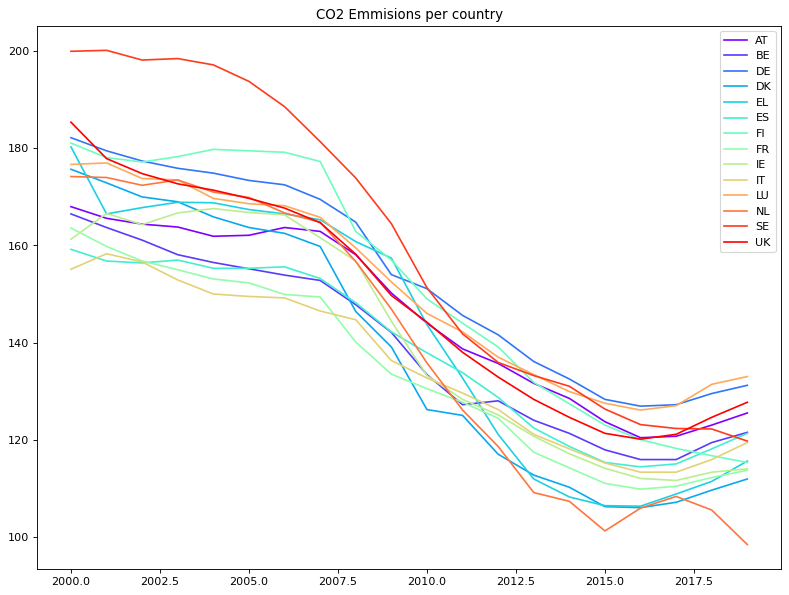

In [70]:
def plot_co2_emmisions_by_country(plot_title):  
    figure(figsize=(12, 9), dpi=80)
    #get list of countries
    countries=df_co2["Location"].unique()
    n=len(countries)
    #generate colors
    color = cm.rainbow(np.linspace(0, 1, n))
    i=0
    for country in countries:    
        plt.plot(df_co2[df_co2["Location"]==country]["Year"],df_co2[df_co2["Location"]==country]["Average_CO2_Emission_perkm"],c=color[i],label=country)
        i=i+1
    #show legend
    plt.legend()
    plt.title(plot_title)
    plt.show()
    
plot_co2_emmisions_by_country  ("CO2 Emmisions per country")  

In [72]:
#sum_for_year=df_co2[df_co2["Year"]==2000]["Average_CO2_Emission_perkm"].sum()

2429.2999999999997

# Data Modal Split

In [77]:
#load dataset
df_modal_split=pd.read_csv("/Users/mihaicata/TUW/Semester 2 W2021/Data Oriented Programming Paradigms/DOPP/ModalSplit/MODSPLIT_vehicletype_country_year_percentage_full_time_period_all_countries.csv")


In [78]:
#examine data structure for a country
df_modal_split[df_modal_split["Country"]=="AT"]

VehicleType Country  Year  Percentage
0             BUS_TOT      AT  2019        10.1
37                CAR      AT  2019        77.0
74                TRN      AT  2019        12.9
108   TRN_BUS_TOT_AVD      AT  2019        23.0
145           BUS_TOT      AT  2018        10.1
...               ...     ...   ...         ...
4168  TRN_BUS_TOT_AVD      AT  1991        20.8
4205          BUS_TOT      AT  1990         8.2
4242              CAR      AT  1990        79.6
4279              TRN      AT  1990        12.3
4313  TRN_BUS_TOT_AVD      AT  1990        20.4

[120 rows x 4 columns]

In [106]:
#show all rows
pd.set_option('display.max_rows', None)
#df_modal_split[df_modal_split["Country"]=="EU27_2020"]
#restructure columns for the bar plot
modal_europe_yearly=df_modal_split[df_modal_split["Country"]=="EU27_2020"].pivot_table("Percentage",["Year"],"VehicleType")
#remove last column
del modal_europe_yearly["TRN_BUS_TOT_AVD"]
#add year column
modal_europe_yearly["Yr"]=modal_europe_yearly.index.values
modal_europe_yearly

VehicleType  BUS_TOT   CAR  TRN    Yr
Year                                 
2000            11.0  81.6  7.4  2000
2001            10.8  82.0  7.3  2001
2002            10.5  82.5  7.0  2002
2003            10.4  82.8  6.8  2003
2004            10.4  82.7  6.9  2004
2005            10.4  82.6  7.0  2005
2006            10.2  82.6  7.1  2006
2007            10.4  82.3  7.2  2007
2008            10.4  82.2  7.4  2008
2009             9.7  83.2  7.1  2009
2010             9.8  83.0  7.1  2010
2011             9.9  82.8  7.3  2011
2012            10.0  82.4  7.6  2012
2013            10.4  81.9  7.7  2013
2014            10.1  82.2  7.7  2014
2015             9.9  82.4  7.7  2015
2016             9.8  82.6  7.6  2016
2017             9.3  82.9  7.8  2017
2018             9.3  82.8  7.9  2018
2019             9.2  82.8  8.0  2019

Text(0, 0.5, 'Percentage')

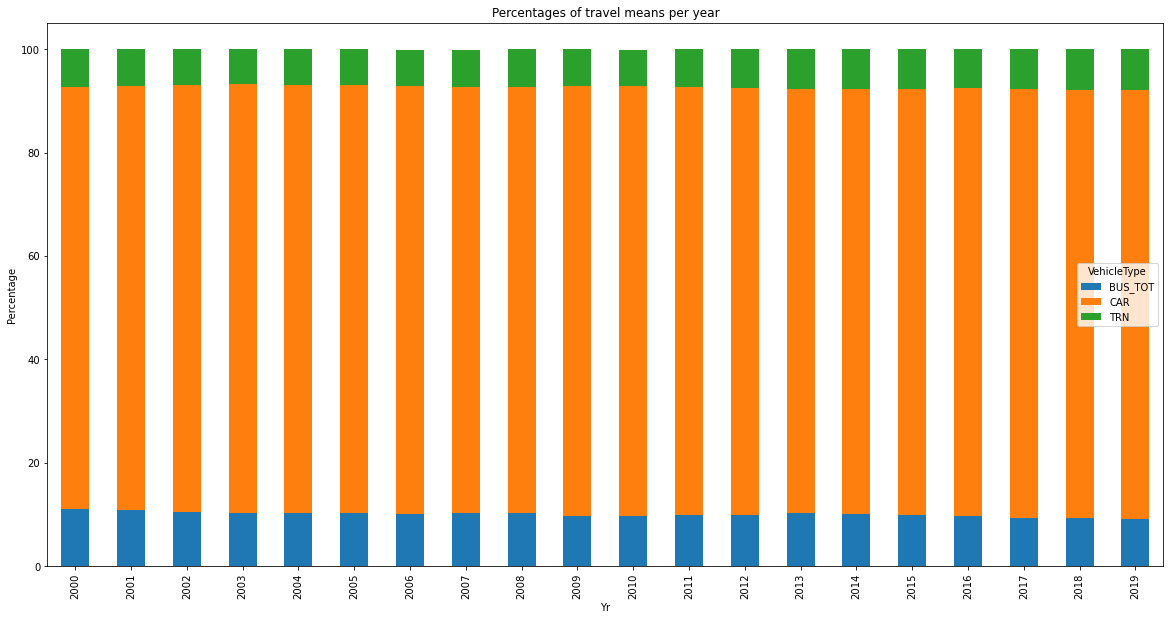

In [131]:
#stacked bar plot
#Q: how did the usage of means of trainsportations change over the years
modal_plot=modal_europe_yearly.plot(
  x = 'Yr', 
  kind = 'bar', 
  stacked = True, 
  title = 'Percentages of travel means per year', 
  mark_right = True,
  figsize=(20,10))
modal_plot.set_ylabel("Percentage")
#A: on a european level, it didn't change much in the last 20 years

In [104]:
def plot_co2_emmisions_by_country(plot_title):  
    figure(figsize=(12, 9), dpi=80)
    #get list of countries
    countries=df_co2["Location"].unique()
    n=len(countries)
    #generate colors
    color = cm.rainbow(np.linspace(0, 1, n))
    i=0
    for country in countries:    
        plt.plot(df_co2[df_co2["Location"]==country]["Year"],df_co2[df_co2["Location"]==country]["Average_CO2_Emission_perkm"],c=color[i],label=country)
        i=i+1
    #show legend
    plt.legend()
    plt.title(plot_title)
    plt.show()
    
plot_co2_emmisions_by_country  ("CO2 Emmisions per country")  

In [105]:
modal_europe_yearly

VehicleType  BUS_TOT   CAR  TRN    Yr
Year                                 
2000            11.0  81.6  7.4  2000
2001            10.8  82.0  7.3  2001
2002            10.5  82.5  7.0  2002
2003            10.4  82.8  6.8  2003
2004            10.4  82.7  6.9  2004
2005            10.4  82.6  7.0  2005
2006            10.2  82.6  7.1  2006
2007            10.4  82.3  7.2  2007
2008            10.4  82.2  7.4  2008
2009             9.7  83.2  7.1  2009
2010             9.8  83.0  7.1  2010
2011             9.9  82.8  7.3  2011
2012            10.0  82.4  7.6  2012
2013            10.4  81.9  7.7  2013
2014            10.1  82.2  7.7  2014
2015             9.9  82.4  7.7  2015
2016             9.8  82.6  7.6  2016
2017             9.3  82.9  7.8  2017
2018             9.3  82.8  7.9  2018
2019             9.2  82.8  8.0  2019

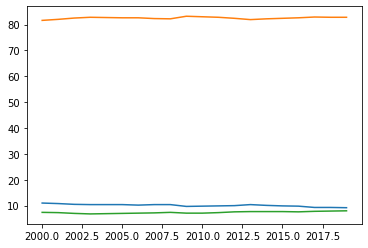

In [114]:
modalities=["BUS_TOT","CAR","TRN"]
for i in modalities:
    plt.plot(modal_europe_yearly["Yr"],modal_europe_yearly[i])
plt.show()

# Data GDP

In [115]:
#load dataset
df_gdp=pd.read_csv("/Users/mihaicata/TUW/Semester 2 W2021/Data Oriented Programming Paradigms/DOPP/ModalTransportToGDP/GDP_unit_location_year_gdp_full_time_period_all_countries.csv")


The indicator is calculated by taking the ratio between transport performance (in passenger-kilometres) and Gross Domestic Product (GDP) (chain-linked volumes, at 2010 exchange rates), and indexing on a single reference year (2010).

The passenger transport performance should be based on the movements on the respective national territory ('territoriality principle'), regardless of the nationality of the vehicle. However, data collection methodology for road passenger transport is not harmonised at the EU level. Data are collected on a voluntary basis, a variety of sources have been used and also estimates made. Detailed information can be found in the metadata information relating to table tran_hv_psmod on the Modal Split of passenger transport.

The indicators are based on inland transport only. Although statistics on air and sea transport are available, due to their predominantly international nature, there are conceptual difficulties in dealing with these modes in a manner consistent with the inland modes.

The units used for measuring the transport performance for passenger transport are  passenger-kilometre (pkm). Passenger-kilometre represents one passenger travelling a distance of one kilometre.

Text(0, 0.5, 'Passenger-kilometer/GDP')

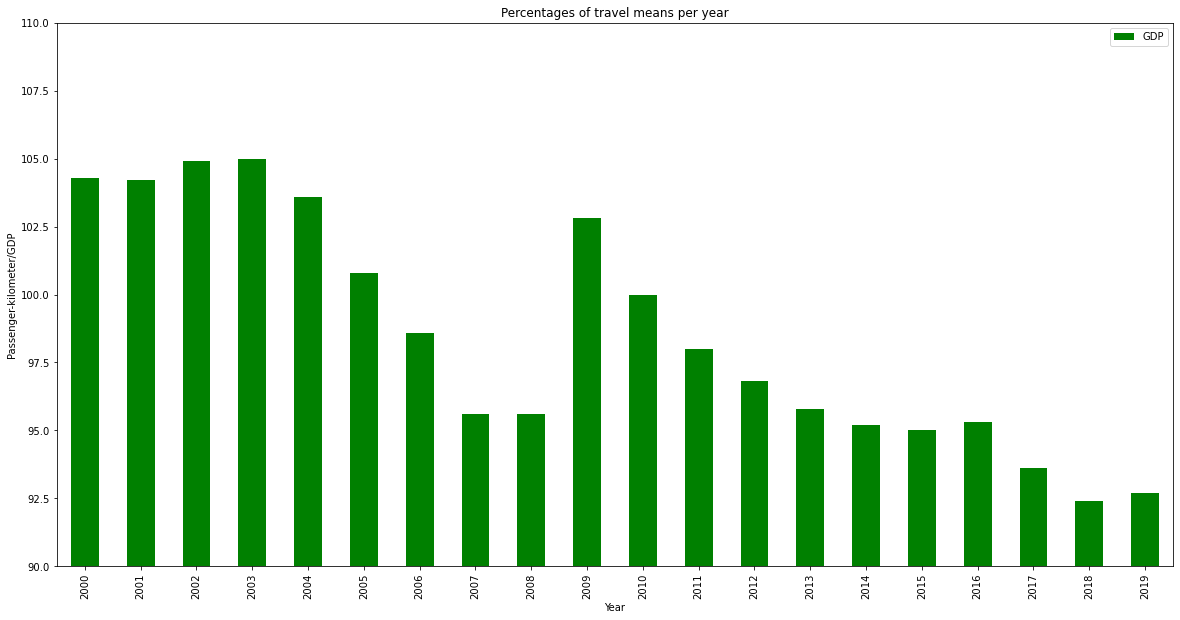

In [129]:
#get aggregated data for entire europe and sort for by year asc
gdp_yearly_europe=df_gdp[df_gdp["Location"]=="EU27_2020"].sort_values("Year").dropna()
ax=gdp_yearly_europe.plot(
  x = 'Year', 
  kind = 'bar', 
  stacked = True, 
  title = 'Percentages of travel means per year', 
  mark_right = True,
  color="green",
  figsize=(20,10))
#set y axis limits
ax.set_ylim(90,110)
ax.set_ylabel("Passenger-kilometer/GDP")

# Data Train Transport

In [138]:
#load dataset
df_train=pd.read_csv("/Users/mihaicata/TUW/Semester 2 W2021/Data Oriented Programming Paradigms/DOPP/RailwayTransport/RW_unit_location_year_RW_full_time_period.csv")


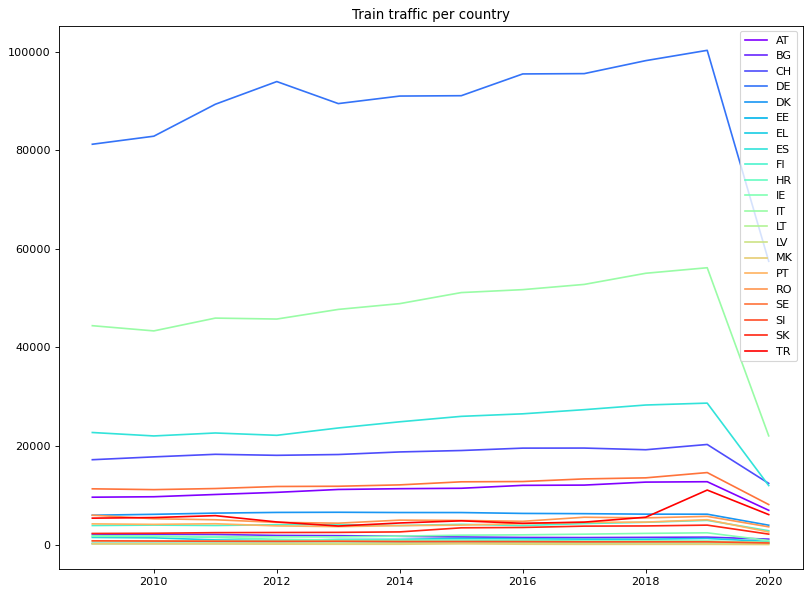

In [146]:
def plot_train_traffic_by_country(plot_title):  
    figure(figsize=(12, 9), dpi=80)
    #get list of countries
    countries=df_train["Location"].unique()
    n=len(countries)
    #generate colors
    color = cm.rainbow(np.linspace(0, 1, n))
    i=0
    for country in countries:    
        plt.plot(df_train[df_train["Location"]==country]["Year"],df_train[df_train["Location"]==country]["Passenger_kilometers_in_millions"],c=color[i],label=country)
        i=i+1
    #show legend
    plt.legend(loc='upper right')    
    plt.title(plot_title)
    plt.show()
plot_train_traffic_by_country  ("Train traffic per country")  

We can see a sharp decline in 2020, probably due to covid.